# Импорт

In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [2]:
field_size = 6

In [3]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2 - 100 * np.eye(field_size)
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2 - 100 * np.eye(field_size)

In [4]:
print(feromon_map)

[[-99.62054002   0.50991039   0.59865612   0.29736816   0.47623316
    0.36071699]
 [  0.50991039 -99.7182495    0.82798657   0.59357285   0.53174451
    0.32052282]
 [  0.59865612   0.82798657 -99.66310421   0.50028506   0.36580409
    0.52354964]
 [  0.29736816   0.59357285   0.50028506 -99.35418213   0.71355865
    0.81948421]
 [  0.47623316   0.53174451   0.36580409   0.71355865 -99.22099043
    0.50652165]
 [  0.36071699   0.32052282   0.52354964   0.81948421   0.50652165
  -99.6623508 ]]


In [5]:
print(distance_map)

[[-99.03545121   0.51310643   0.50718546   0.38705138   0.40096208
    0.18012226]
 [  0.51310643 -99.88171737   0.53997134   0.55136342   0.18892318
    0.38764489]
 [  0.50718546   0.53997134 -99.90769208   0.79282157   0.84219076
    0.36685222]
 [  0.38705138   0.55136342   0.79282157 -99.95088369   0.37918862
    0.46257863]
 [  0.40096208   0.18892318   0.84219076   0.37918862 -99.59045905
    0.38205446]
 [  0.18012226   0.38764489   0.36685222   0.46257863   0.38205446
  -99.47243464]]


In [6]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


In [7]:
def random_experement(ant: Ant, 
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=[np.random.randint(0, field_size), 
                              np.random.randint(0, field_size)], 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [8]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=pos, 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [9]:
ants = [Ant(walk_distance=field_size+1, a=1, b=i) for i in range(1, 5)] + [Ant(walk_distance=field_size+1, a=i, b=1) for i in range(2, 5)]
feromon_map_updater = TrackOfWalk(feromon_volume=field_size*2, feromon_erosion_speed=0.7)


# Опыт со случайной расстановкой

Сравнение результатов при разных гиппер-параметрах у муравья.

In [10]:
results = list()
for ant in ants:
    results.append(random_experement(ant=ant, 
                                     feromon_map_updater=feromon_map_updater, 
                                     feromon_map=feromon_map, 
                                     distance_map=distance_map, 
                                     num_of_iteration=40))

In [18]:
results

[array([[-4.24639948e-24,  2.37805996e+00, -1.17121118e-27,
         -4.40475919e-24,  2.08220329e+00, -1.02572353e-34],
        [ 2.37805996e+00,  1.46546728e-20,  5.65953438e+00,
         -4.96560107e-24, -1.71225062e-25, -1.41011201e-26],
        [-1.17121118e-27,  5.65953438e+00,  6.94471967e-29,
         -4.35110509e-25, -3.62870271e-25,  5.51363180e+00],
        [-4.40475919e-24, -4.96560107e-24, -4.35110509e-25,
          4.95506335e-27,  9.56617065e-08,  2.44627659e-14],
        [ 2.08220329e+00, -1.71225062e-25, -3.62870271e-25,
          9.56617065e-08,  2.96803353e-29,  1.97964060e+00],
        [-1.02572353e-34, -1.41011201e-26,  5.51363180e+00,
          2.44627659e-14,  1.97964060e+00, -2.08709534e-33]]),
 array([[-6.40413984e-42, -7.51488823e-43,  2.18517100e-01,
          6.29337075e-01,  1.54887100e-16, -2.57435277e-23],
        [-7.51488823e-43,  5.51578843e-37,  2.35400504e-01,
         -7.87067201e-30,  2.60525955e-01, -1.01376829e-02],
        [ 2.18517100e-01,  2.3

[(0, 1, 2.378059957484622),
 (0, 4, 2.0822032940230804),
 (1, 2, 5.659534384231274),
 (2, 5, 5.5136317975898805),
 (4, 5, 1.9796405960295786)]

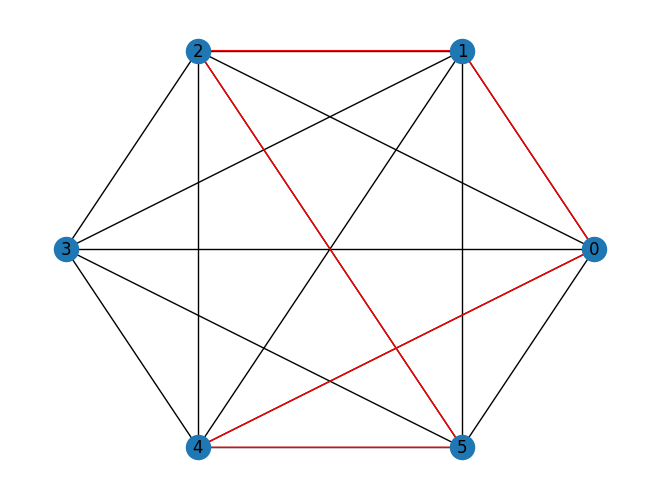

In [19]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G1 = nx.Graph()

for start, end, length in edges:
    G1.add_edge(start, end, length=length)


nx.draw_circular(G1, with_labels = True)
nx.draw_networkx_edges(G1, nx.circular_layout(G1), edgelist=edges_res, edge_color='r', arrows=True)

edges_res


[(0, 2, -1.1712111767413469e-27),
 (0, 3, -4.404759189249598e-24),
 (1, 2, 5.659534384231274),
 (1, 4, -1.7122506176301462e-25),
 (3, 4, 9.566170651701562e-08)]

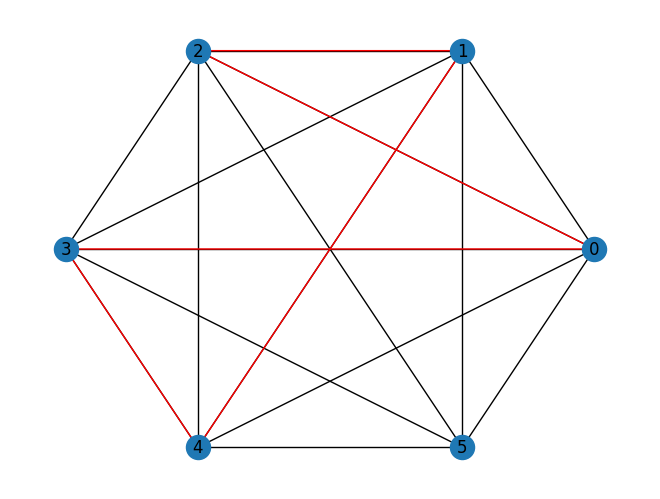

In [20]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G2 = nx.Graph()

for start, end, length in edges:
    G2.add_edge(start, end, length=length)


nx.draw_circular(G2, with_labels = True)
nx.draw_networkx_edges(G2, nx.circular_layout(G2), edgelist=edges_res, edge_color='r', arrows=True)
edges_res


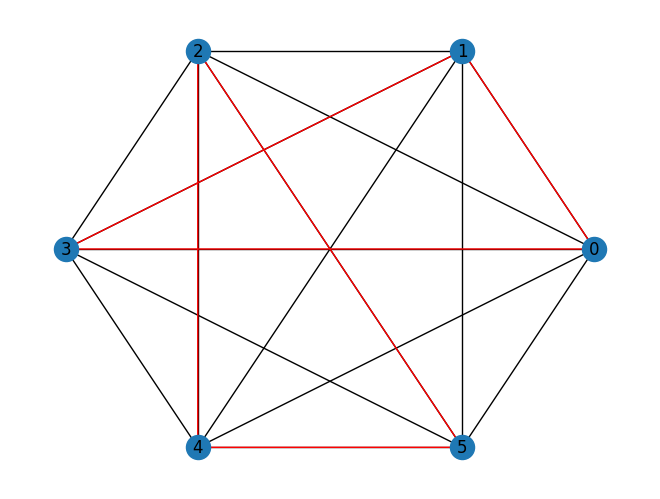

In [13]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G3 = nx.Graph()

for start, end, length in edges:
    G3.add_edge(start, end, length=length)


nx.draw_circular(G3, with_labels = True)
nx.draw_networkx_edges(G3, nx.circular_layout(G3), edgelist=edges_res, edge_color='r', arrows=True)


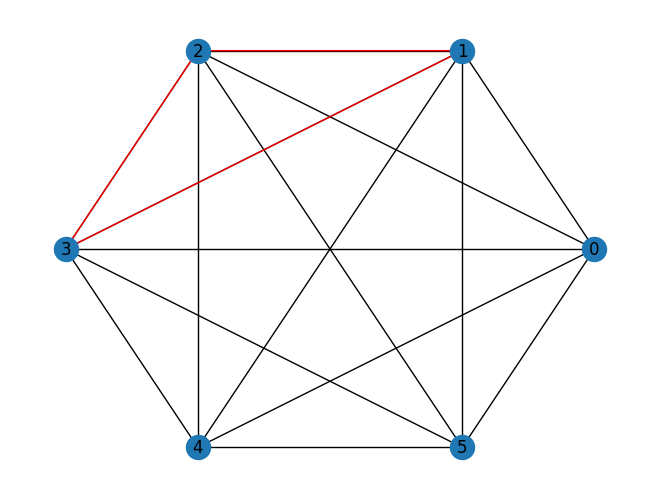

In [14]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G4 = nx.Graph()

for start, end, length in edges:
    G4.add_edge(start, end, length=length)


nx.draw_circular(G4, with_labels = True)
nx.draw_networkx_edges(G4, nx.circular_layout(G4), edgelist=edges_res, edge_color='r', arrows=True)


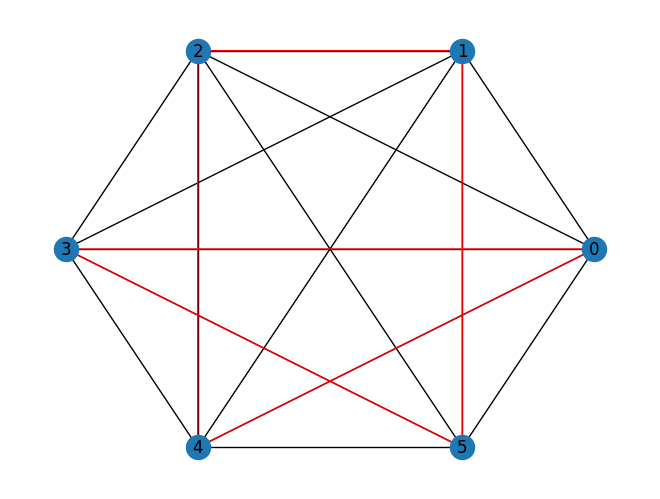

In [15]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G5 = nx.Graph()

for start, end, length in edges:
    G5.add_edge(start, end, length=length)


nx.draw_circular(G5, with_labels = True)
nx.draw_networkx_edges(G5, nx.circular_layout(G5), edgelist=edges_res, edge_color='r', arrows=True)


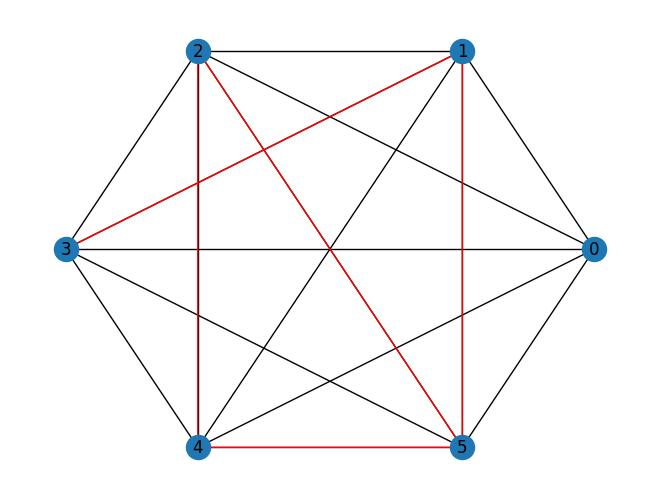

In [16]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G6 = nx.Graph()

for start, end, length in edges:
    G6.add_edge(start, end, length=length)


nx.draw_circular(G6, with_labels = True)
nx.draw_networkx_edges(G6, nx.circular_layout(G6), edgelist=edges_res, edge_color='r', arrows=True)


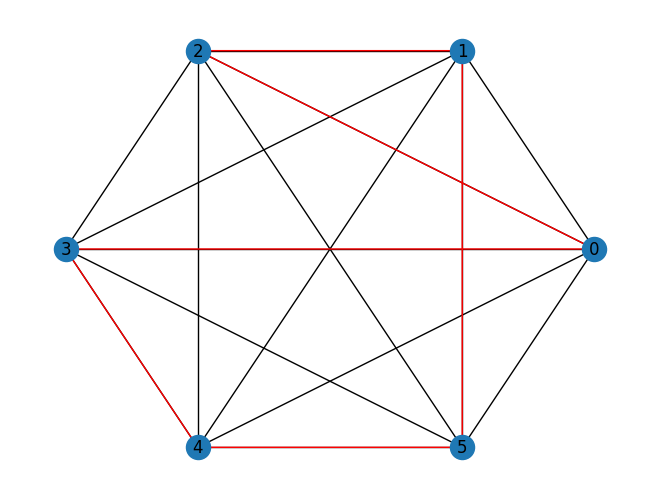

In [17]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G7 = nx.Graph()

for start, end, length in edges:
    G7.add_edge(start, end, length=length)


nx.draw_circular(G7, with_labels = True)
nx.draw_networkx_edges(G7, nx.circular_layout(G7), edgelist=edges_res, edge_color='r', arrows=True)


# Опыт с фиксированной расстановкой

Сравнение результатов при разных гиппер-параметрах у муравья.

In [68]:
results = list()
for ant in ants:
    results.append(experement(ant=ant, 
                              pos=[0, 0], 
                              feromon_map_updater=feromon_map_updater,
                              feromon_map=feromon_map, 
                              distance_map=distance_map, 
                              num_of_iteration=20))

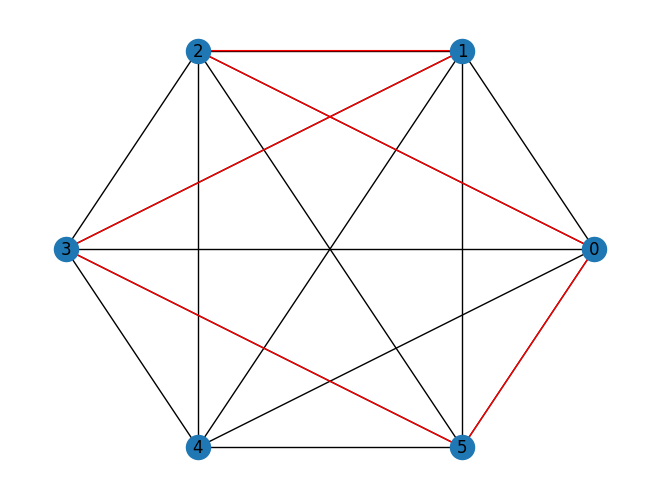

In [69]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F1 = nx.Graph()

for start, end, length in edges:
    F1.add_edge(start, end, length=length)


nx.draw_circular(F1, with_labels = True)
nx.draw_networkx_edges(F1, nx.circular_layout(F1), edgelist=edges_res, edge_color='r', arrows=True)


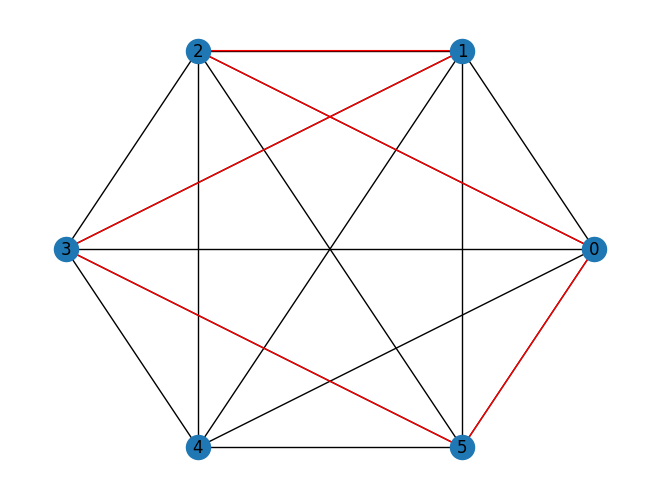

In [70]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F2 = nx.Graph()

for start, end, length in edges:
    F2.add_edge(start, end, length=length)


nx.draw_circular(F2, with_labels = True)
nx.draw_networkx_edges(F2, nx.circular_layout(F2), edgelist=edges_res, edge_color='r', arrows=True)


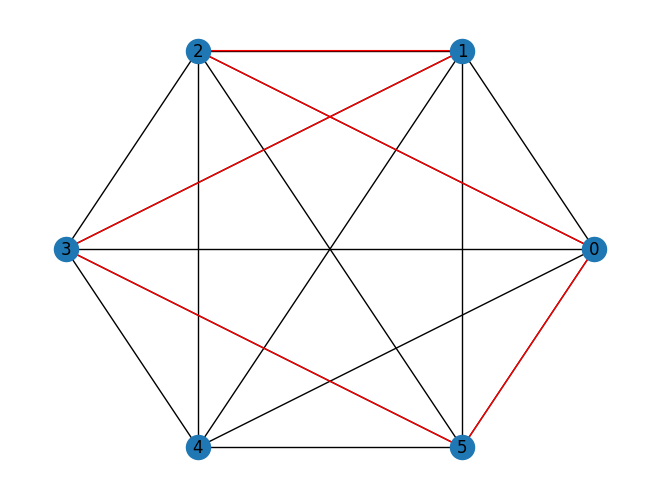

In [71]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F3 = nx.Graph()

for start, end, length in edges:
    F3.add_edge(start, end, length=length)


nx.draw_circular(F3, with_labels = True)
nx.draw_networkx_edges(F3, nx.circular_layout(F3), edgelist=edges_res, edge_color='r', arrows=True)


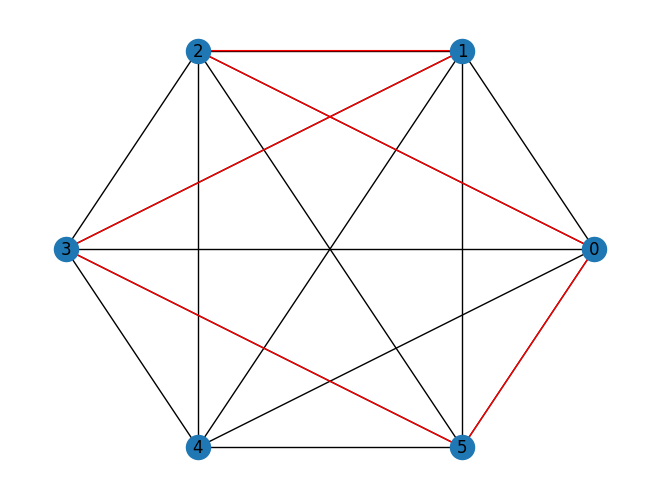

In [72]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F4 = nx.Graph()

for start, end, length in edges:
    F4.add_edge(start, end, length=length)


nx.draw_circular(F4, with_labels = True)
nx.draw_networkx_edges(F4, nx.circular_layout(F4), edgelist=edges_res, edge_color='r', arrows=True)


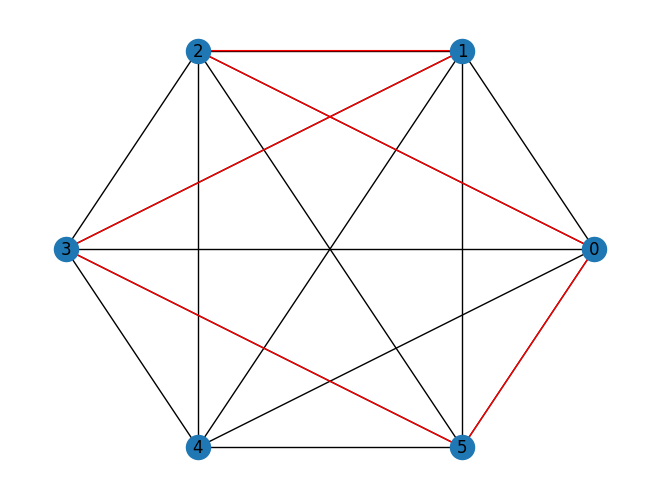

In [73]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F5 = nx.Graph()

for start, end, length in edges:
    F5.add_edge(start, end, length=length)


nx.draw_circular(F5, with_labels = True)
nx.draw_networkx_edges(F5, nx.circular_layout(F5), edgelist=edges_res, edge_color='r', arrows=True)


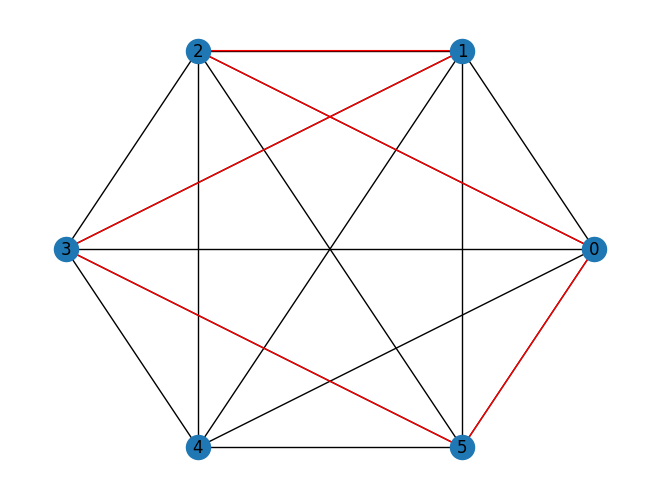

In [74]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F6 = nx.Graph()

for start, end, length in edges:
    F6.add_edge(start, end, length=length)


nx.draw_circular(F6, with_labels = True)
nx.draw_networkx_edges(F6, nx.circular_layout(F6), edgelist=edges_res, edge_color='r', arrows=True)


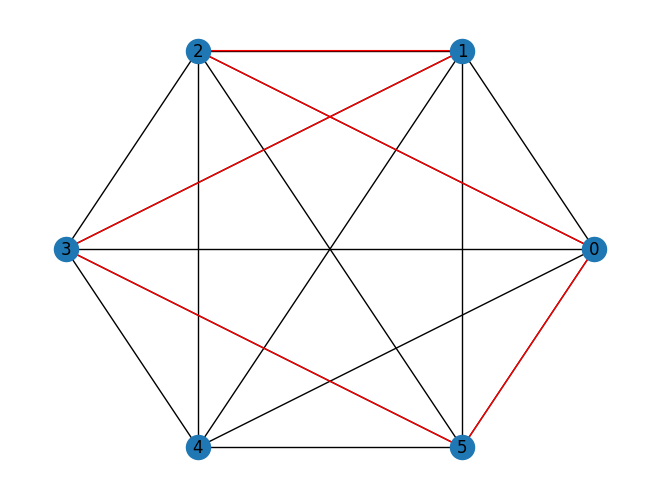

In [75]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F7 = nx.Graph()

for start, end, length in edges:
    F7.add_edge(start, end, length=length)


nx.draw_circular(F7, with_labels = True)
nx.draw_networkx_edges(F7, nx.circular_layout(F7), edgelist=edges_res, edge_color='r', arrows=True)
